[['Virginica' 'Virginica']
 ['Versicolor' 'Versicolor']
 ['Virginica' 'Virginica']
 ['Setosa' 'Setosa']
 ['Setosa' 'Setosa']
 ['Setosa' 'Setosa']
 ['Virginica' 'Virginica']
 ['Versicolor' 'Versicolor']
 ['Setosa' 'Setosa']
 ['Versicolor' 'Versicolor']
 ['Virginica' 'Virginica']
 ['Virginica' 'Virginica']
 ['Virginica' 'Virginica']
 ['Versicolor' 'Versicolor']
 ['Setosa' 'Setosa']
 ['Versicolor' 'Versicolor']
 ['Virginica' 'Virginica']
 ['Virginica' 'Virginica']
 ['Versicolor' 'Versicolor']
 ['Versicolor' 'Versicolor']
 ['Virginica' 'Virginica']
 ['Versicolor' 'Virginica']
 ['Virginica' 'Virginica']
 ['Versicolor' 'Versicolor']
 ['Virginica' 'Virginica']
 ['Versicolor' 'Versicolor']
 ['Versicolor' 'Versicolor']
 ['Virginica' 'Virginica']
 ['Versicolor' 'Versicolor']
 ['Versicolor' 'Versicolor']
 ['Versicolor' 'Versicolor']
 ['Virginica' 'Virginica']
 ['Virginica' 'Virginica']
 ['Setosa' 'Setosa']
 ['Versicolor' 'Versicolor']
 ['Versicolor' 'Versicolor']
 ['Versicolor' 'Versicolor']
 ['V

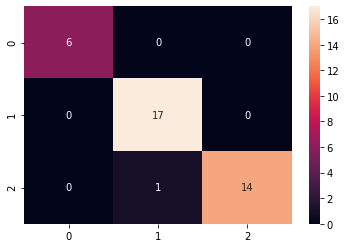

In [3]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
# importing iris data as csv 
datafile = pd.read_csv('C:/data/irisdata.csv')
x = datafile.iloc[:,0:4].values
y = datafile.iloc[:,-1].values
#spliting the datafile 
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
#SVM Classifier using scikit-learn
from sklearn.svm import SVC
cf = SVC(kernel = 'linear')
cf.fit(x_train,y_train)
# TESTING THE MODEL 
y_pred =cf.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#performance of model 
c_m = confusion_matrix(y_test,y_pred)
print('confusion matrix:', c_m)
sns.heatmap(c_m,annot=True)
# finding the accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy=accuracy*100
print('accuracy:',accuracy)



In [29]:
# que 2 PCA and LDA

eigen values:
 [0.23245325 0.0324682  0.00959685 0.00176432]
Eigenvectors:
 [[ 0.42494212 -0.42320271 -0.71357236  0.36213001]
 [-0.15074824 -0.90396711  0.33631602 -0.21681781]
 [ 0.61626702  0.06038308 -0.0659003  -0.78244872]
 [ 0.64568888  0.00983925  0.61103451  0.45784921]]
eigen values in descending order:
0.2324532509731272
0.032468203586369336
0.009596846477168049
0.0017643192410086816


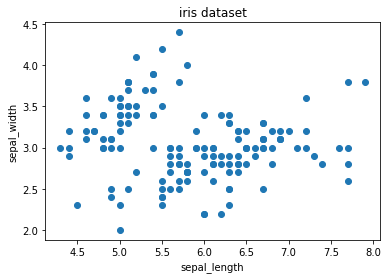

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
#Importing iris dataset as csv file 
datafile = pd.read_csv('C:/data/irisdata.csv')
datafile
#Visualize the dataset
x = datafile.iloc[:,-1].values
df = datafile[['sepal.length','sepal.width','petal.length','petal.width']]
#create figures and axis 
fig,ax = plt.subplots()
ax.scatter(df['sepal.length'],df['sepal.width'])
ax.set_title('iris dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
# normalization of dataset
y=df.apply(lambda y:(y-y.min(axis=0))/(y.max(axis=0)-y.min(axis=0)))
#mean and covariance matrix
mean = np.mean(y,axis=0)
y=y-mean
covariance_matrix=np.cov(y.T)
#EIGEN DECOMPOSITION
eigen_values,eigen_vectors= np.linalg.eig(covariance_matrix)
print('eigen values:\n',eigen_values)
print('Eigenvectors:\n',eigen_vectors)
eigen_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i])for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda x:x[0], reverse=True)
print('eigen values in descending order:')
for i in  eigen_pairs:
    print(i[0])



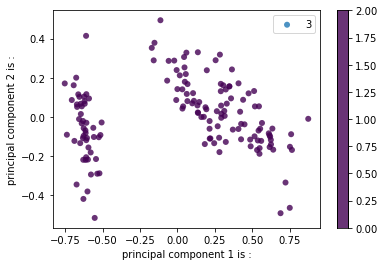

In [3]:
eigen_vectors=eigen_vectors.T
index=np.argsort(eigen_values)[::-1]
eigen_values=eigen_values[index]
eigen_vectors=eigen_vectors[index]
components= eigen_vectors[0:2]
X = np.dot(y,components.T)
E1 = X[:,0]
E2= X[:,1]
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
x=L.fit_transform(x)
plt.scatter(E1,E2,c=x,edgecolor='none',alpha=0.8,cmap = plt.cm.get_cmap('viridis',1),label='3')
plt.colorbar()
plt.xlabel('principal component 1 is :')
plt.ylabel('principal component 2 is :')
plt.legend()
plt.show()